<a href="https://colab.research.google.com/github/Apoorva-Khare/ML_Models_Implementation/blob/main/Linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("health_insurance.csv")
df

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1300 non-null   int64  
 1   gender        1300 non-null   object 
 2   bmi           1300 non-null   float64
 3   bp            1300 non-null   int64  
 4   children      1300 non-null   int64  
 5   region        1300 non-null   object 
 6   smoker        1300 non-null   object 
 7   medical_cost  1300 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 81.4+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500


In [ ]:
print('Shape:', df.shape)
print('Rows:', df.shape[0])
print("Columns:", df.shape[1])

Shape: (1300, 8)
Rows: 1300
Columns: 8


In [ ]:
df.describe()

,age,bmi,bp,children,medical_cost
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,42.280769,31.581396,147.774615,1.104615,13243.214691
std,14.024847,6.356487,11.221987,1.208697,12060.371167
min,19.000000,15.290000,120.000000,0.000000,1121.873900
25%,29.750000,27.207500,140.000000,0.000000,4760.155950
50%,42.000000,31.645000,150.000000,1.000000,9388.753650
75%,54.000000,35.488750,156.000000,2.000000,16579.959053
max,69.000000,57.130000,178.000000,5.000000,63770.428010


<Axes: xlabel='age', ylabel='Count'>

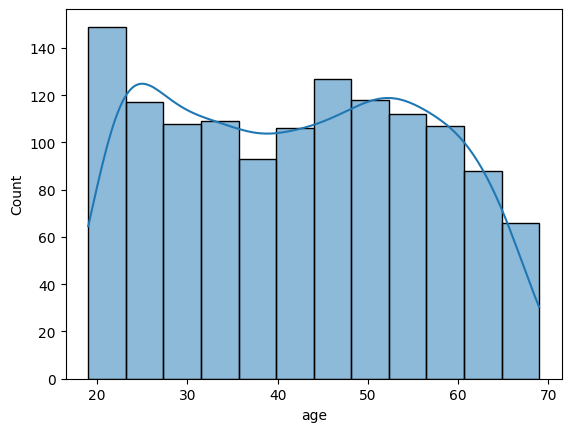

In [ ]:
sns.histplot(df['age'], kde = True)

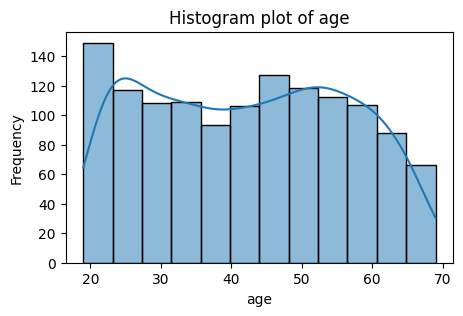

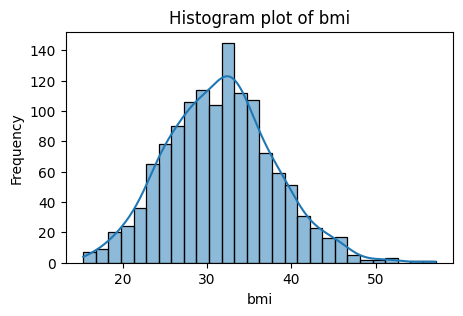

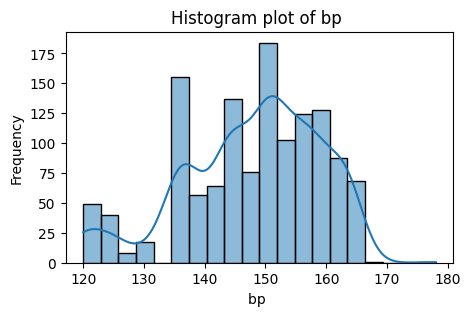

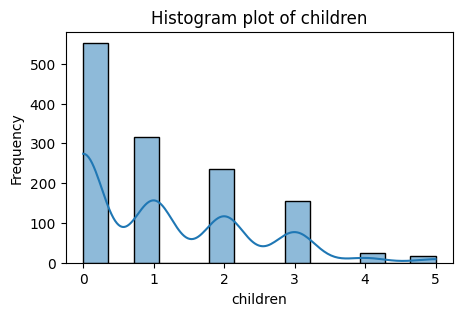

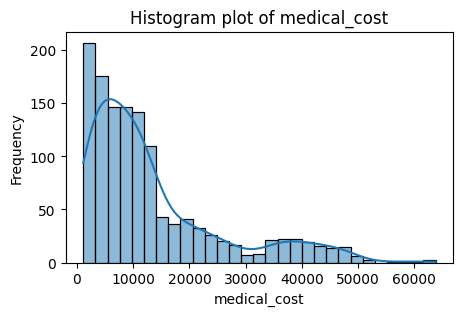

In [ ]:
for col in df.select_dtypes(include = np.number):
  plt.figure(figsize = (5, 3))
  sns.histplot(df[col], kde = True)
  plt.title(f'Histogram plot of {col}')
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

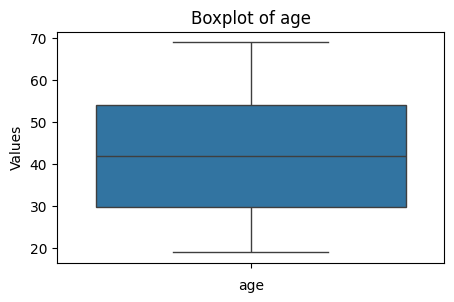

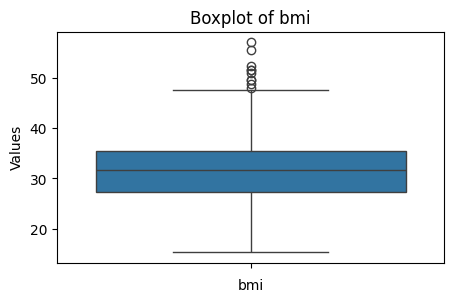

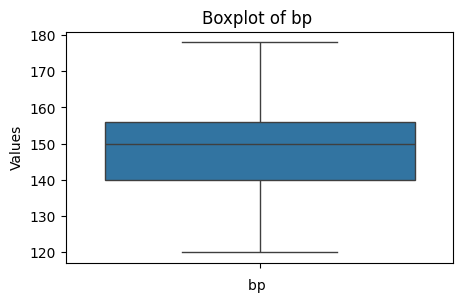

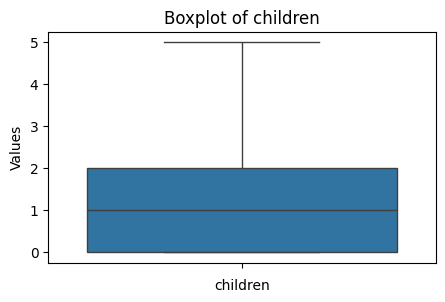

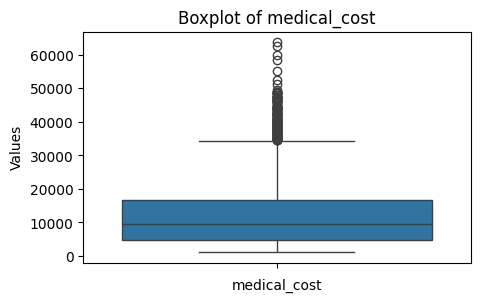

In [ ]:
for col in df.select_dtypes(include = np.number):
  plt.figure(figsize = (5, 3))
  sns.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.ylabel("Values")
  plt.show()

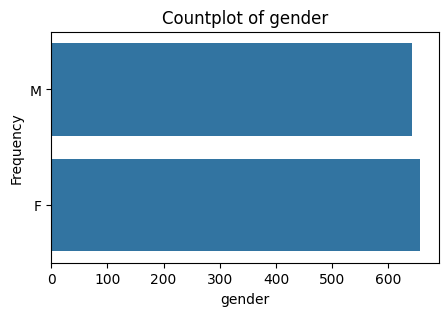

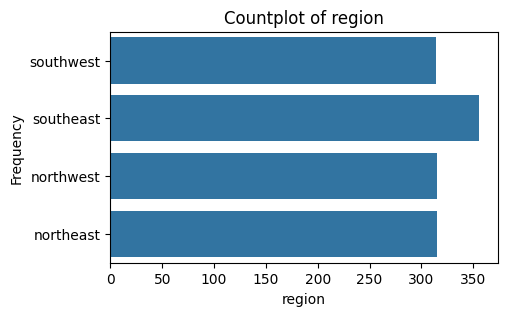

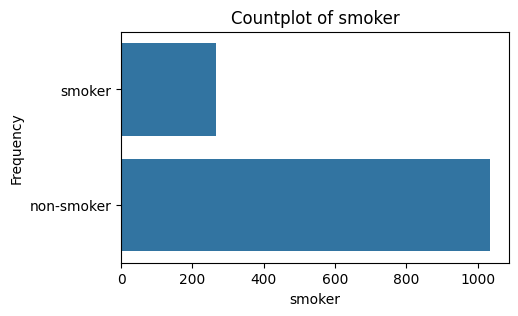

In [ ]:
for col in df.select_dtypes(exclude = np.number):
  plt.figure(figsize = (5, 3))
  sns.countplot(df[col])
  plt.title(f'Countplot of {col}')
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

In [ ]:
# dealing with categorical values
# label encoding
# male = 1, female =0
df.loc[df['gender'] == 'F', 'gender'] = 0
df.loc[df['gender'] == 'M', 'gender'] = 1

df.loc[df['smoker'] == 'smoker', 'smoker'] = 1
df.loc[df['smoker'] == 'non-smoker', 'smoker'] = 0

In [ ]:
df

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,1,31.900,157,0,southwest,1,16884.92400
1,20,0,36.770,160,1,southeast,0,1725.55230
2,33,0,35.000,145,3,southeast,0,4449.46200
3,37,0,23.705,153,0,northwest,0,21984.47061
4,36,0,27.880,156,0,northwest,0,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,0,30.970,143,3,southwest,0,10600.54830
1296,22,1,34.920,156,0,northeast,0,2205.98080
1297,21,1,34.850,145,0,southeast,0,1629.83350
1298,22,1,24.800,150,0,northwest,0,2007.94500


In [ ]:
# one hod encoding
df = pd.get_dummies(df, columns = ['region'])
df

,age,gender,bmi,bp,children,smoker,medical_cost,region_northeast,region_northwest,region_southeast,region_southwest
0,23,1,31.900,157,0,1,16884.92400,False,False,False,True
1,20,0,36.770,160,1,0,1725.55230,False,False,True,False
2,33,0,35.000,145,3,0,4449.46200,False,False,True,False
3,37,0,23.705,153,0,0,21984.47061,False,True,False,False
4,36,0,27.880,156,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1295,54,0,30.970,143,3,0,10600.54830,False,False,False,True
1296,22,1,34.920,156,0,0,2205.98080,True,False,False,False
1297,21,1,34.850,145,0,0,1629.83350,False,False,True,False
1298,22,1,24.800,150,0,0,2007.94500,False,True,False,False


In [ ]:
df.replace({False :0, True :1}, inplace = True)
df.head()

,age,gender,bmi,bp,children,smoker,medical_cost,region_northeast,region_northwest,region_southeast,region_southwest
0,23,1,31.900,157,0,1,16884.92400,0,0,0,1
1,20,0,36.770,160,1,0,1725.55230,0,0,1,0
2,33,0,35.000,145,3,0,4449.46200,0,0,1,0
3,37,0,23.705,153,0,0,21984.47061,0,1,0,0
4,36,0,27.880,156,0,0,3866.85520,0,1,0,0


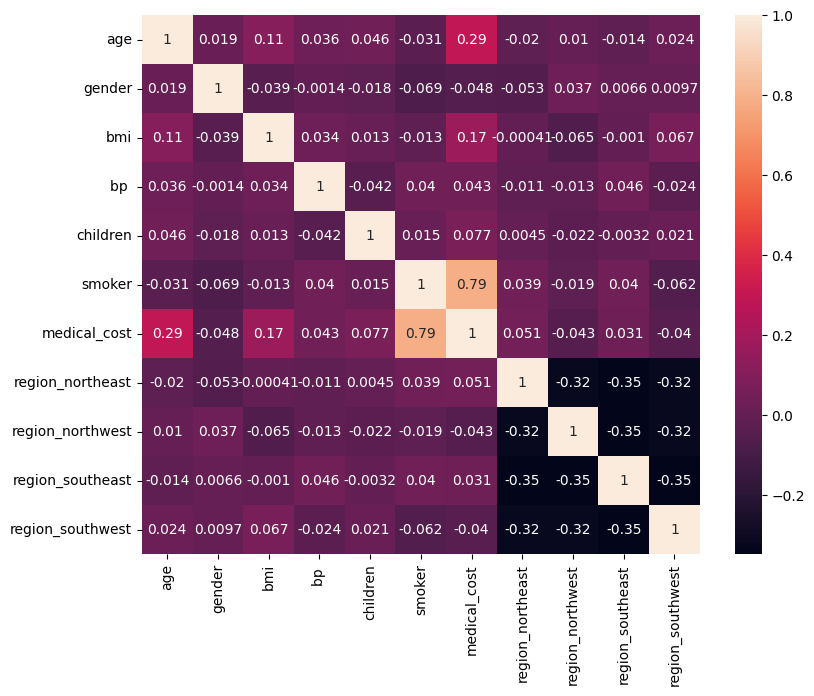

In [ ]:
plt.figure(figsize = (9,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
X = df[['smoker']]
y = df[['medical_cost']]

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)



In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print('Training R2 Score:', np.round(r2_score(y_train,y_train_pred )))
print('Testing R2 Score:', np.round(r2_score(y_test,y_test_pred )))


Training R2 Score: 1.0
Testing R2 Score: 1.0


In [ ]:
# multiple regression
X = df[['age','bmi','smoker']]
y = df[['medical_cost']]

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print('Training R2 Score:', np.round(r2_score(y_train,y_train_pred )))
print('Testing R2 Score:', np.round(r2_score(y_test,y_test_pred )))

Training R2 Score: 1.0
Testing R2 Score: 1.0


In [ ]:
# predict the medical cost based on age, bmi and smoker features
linear_model.predict([[28,30.97,0]])

array([[4429.78635812]])

In [ ]:
linear_model.predict([[28,30.97,1]])

array([[28476.68867586]])